# LAB | Feature Engineering

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [4]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [8]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [16]:
#your code here
print(spaceship.shape)

(8693, 14)


In [11]:
print(spaceship.describe())

               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  


**Check for data types**

In [14]:
#your code here
print(spaceship.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


**Check for missing values**

In [18]:
spaceship.isna().any()

PassengerId     False
HomePlanet       True
CryoSleep        True
Cabin            True
Destination      True
Age              True
VIP              True
RoomService      True
FoodCourt        True
ShoppingMall     True
Spa              True
VRDeck           True
Name             True
Transported     False
dtype: bool

In [13]:
#checking for null values
spaceship.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [17]:
# proportion of missing / Nan
spaceship.isnull().sum() /len(spaceship) * 100

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value.

In [19]:
#your code here

# before deleting:
print(spaceship.shape)

# Let's delete all the rows with at least one missing value:
spaceship.dropna(inplace = True)

# after deleting:
print(spaceship.shape)

(8693, 14)
(6606, 14)


- **Cabin** is too granular - transform it in order to obtain {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [20]:
spaceship['Cabin']

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 6606, dtype: object

In [23]:
#your code here
spaceship['Cabin_Level'] = spaceship['Cabin'].str[0]

display(spaceship['Cabin_Level'])

0       B
1       F
2       A
3       A
4       F
       ..
8688    A
8689    G
8690    G
8691    E
8692    E
Name: Cabin_Level, Length: 6606, dtype: object

- Drop PassengerId and Name

In [24]:
# Drop the 'PassengerId' and 'Name' columns
spaceship = spaceship.drop(columns=['PassengerId', 'Name'])

print(spaceship)

     HomePlanet CryoSleep     Cabin    Destination   Age    VIP  RoomService  \
0        Europa     False     B/0/P    TRAPPIST-1e  39.0  False          0.0   
1         Earth     False     F/0/S    TRAPPIST-1e  24.0  False        109.0   
2        Europa     False     A/0/S    TRAPPIST-1e  58.0   True         43.0   
3        Europa     False     A/0/S    TRAPPIST-1e  33.0  False          0.0   
4         Earth     False     F/1/S    TRAPPIST-1e  16.0  False        303.0   
...         ...       ...       ...            ...   ...    ...          ...   
8688     Europa     False    A/98/P    55 Cancri e  41.0   True          0.0   
8689      Earth      True  G/1499/S  PSO J318.5-22  18.0  False          0.0   
8690      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False          0.0   
8691     Europa     False   E/608/S    55 Cancri e  32.0  False          0.0   
8692     Europa     False   E/608/S    TRAPPIST-1e  44.0  False        126.0   

      FoodCourt  ShoppingMall     Spa  

- For non-numerical columns, do dummies.

In [34]:
#transforming floats to any column being an integer
import numpy as np
for column in spaceship.columns:
  if spaceship[column].dtype == np.float64:
    spaceship[column] = spaceship[column].astype(int)

In [35]:
# Convert non-numerical columns into dummy variables
df_dummies = pd.get_dummies(spaceship, columns=['HomePlanet', 'Destination', 'Cabin_Level'])
df_dummies

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_Level_A,Cabin_Level_B,Cabin_Level_C,Cabin_Level_D,Cabin_Level_E,Cabin_Level_F,Cabin_Level_G,Cabin_Level_T
0,False,B/0/P,39,False,0,0,0,0,0,False,...,False,True,False,True,False,False,False,False,False,False
1,False,F/0/S,24,False,109,9,25,549,44,True,...,False,True,False,False,False,False,False,True,False,False
2,False,A/0/S,58,True,43,3576,0,6715,49,False,...,False,True,True,False,False,False,False,False,False,False
3,False,A/0/S,33,False,0,1283,371,3329,193,False,...,False,True,True,False,False,False,False,False,False,False
4,False,F/1/S,16,False,303,70,151,565,2,True,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,A/98/P,41,True,0,6819,0,1643,74,False,...,False,False,True,False,False,False,False,False,False,False
8689,True,G/1499/S,18,False,0,0,0,0,0,False,...,True,False,False,False,False,False,False,False,True,False
8690,False,G/1500/S,26,False,0,0,1872,1,0,True,...,False,True,False,False,False,False,False,False,True,False
8691,False,E/608/S,32,False,0,1049,0,353,3235,False,...,False,False,False,False,False,False,True,False,False,False


**Perform Train Test Split**

In [36]:
# let's define our features:
features = df_dummies[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]]
features

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,0,0,0,0
1,109,9,25,549,44
2,43,3576,0,6715,49
3,0,1283,371,3329,193
4,303,70,151,565,2
...,...,...,...,...,...
8688,0,6819,0,1643,74
8689,0,0,0,0,0
8690,0,0,1872,1,0
8691,0,1049,0,353,3235


In [37]:
# defining our target
target = spaceship[["Transported"]]
target

,Transported
0,False
1,True
2,False
3,False
4,True
...,...
8688,False
8689,False
8690,True
8691,False


In [38]:
# launching the Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [42]:
# Before moving on to the model selection , let's first normalize / standardize our data points
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()

In [43]:
# Fit it to our training data:
normalizer.fit(X_train)

MinMaxScaler()

In [44]:
# Transforming our training and testing data
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [45]:
X_train_norm

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 7.91600979e-03, 0.00000000e+00, 5.12763299e-02,
        0.00000000e+00],
       ...,
       [0.00000000e+00, 1.59527723e-01, 0.00000000e+00, 3.48893252e-01,
        4.72069237e-03],
       [0.00000000e+00, 1.34169658e-04, 0.00000000e+00, 3.05694395e-02,
        8.74803304e-02],
       [2.01612903e-04, 2.95508671e-02, 0.00000000e+00, 2.57943592e-02,
        1.05232101e-02]])

In [46]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.00000,0.000000,0.000000,0.000000,0.000000
1,0.00000,0.000000,0.000000,0.000000,0.000000
2,0.00000,0.007916,0.000000,0.051276,0.000000
3,0.00131,0.000000,0.046111,0.016378,0.000049
4,0.00000,0.000000,0.000000,0.000000,0.000000


In [47]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.000000,0.0,0.00000,0.0
1,0.0,0.000000,0.0,0.00000,0.0
2,0.0,0.000000,0.0,0.00000,0.0
3,0.0,0.000000,0.0,0.00000,0.0
4,0.0,0.054775,0.0,0.07774,0.0


**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

In [48]:
# Running the knn through Classifier and instancing knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [49]:
# # fitting ou model to normalized X_train and y_train
knn.fit(X_train_norm, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [50]:
#defining our output prediction
pred = knn.predict(X_test_norm)

In [55]:
y_test.dtypes

Transported    bool
dtype: object

In [57]:
import numpy as np

# Assuming pred is a NumPy array
pred_dtype = pred.dtype

print("Data type of elements in pred:", pred_dtype)


Data type of elements in pred: bool


In [58]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming y_test and pred are arrays
# Convert boolean predictions to numerical values (0 and 1)
pred_numeric = pred.astype(int)

# Calculate MSE and RMSE
MSE = mean_squared_error(y_test, pred_numeric)
RMSE = mean_squared_error(y_test, pred_numeric, squared=False)

print("Mean squared error (MSE):", MSE)
print("Root mean squared error (RMSE):", RMSE)

Mean squared error (MSE): 0.2102874432677761
Root mean squared error (RMSE): 0.4585710885650949


- Evaluate your model's performance. Comment it

In [59]:
knn.score(X_test_norm, y_test) # 'knn_score is the devil' - LT

0.789712556732224

In [67]:
#better looking at the precision_score and recallscore
from sklearn.metrics import precision_score,recall_score

print(precision_score(y_test, pred))
print(recall_score(y_test, pred))

0.7641379310344828
0.8381240544629349


In [60]:
RMSE / y_test.mean() #coefficient of variation ?

Transported    0.917142
dtype: float64

In [61]:
1 / y_test.mean() # coefficient of vatiation ?

Transported    2.0
dtype: float64

-- Feature Selection

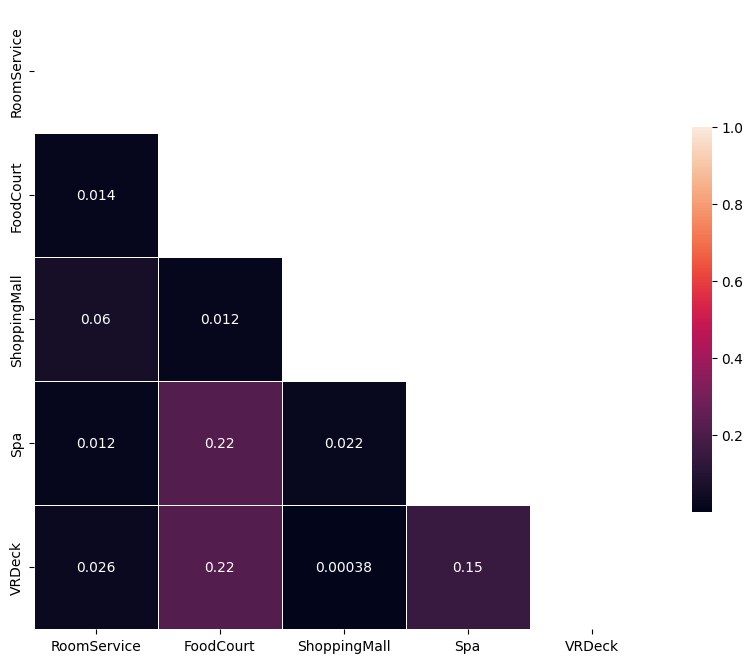

In [63]:
corr=np.abs(features.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [80]:
# Assuming pred and y_test are ndarrays containing predicted and true target values, respectively

# Reshape pred and y_test to 1-dimensional arrays
pred_1d = np.ravel(pred)
y_test_1d = np.ravel(y_test)

# Create a DataFrame with predicted and true values
comparison_df = pd.DataFrame({'Predicted': pred_1d, 'True': y_test_1d})

# Use value_counts() to compare the predicted and true values
value_counts = comparison_df.value_counts()

# Display the value counts
print(value_counts)

Predicted  True 
True       True     554
False      False    490
True       False    171
False      True     107
Name: count, dtype: int64


In [82]:
comparison_df.value_counts()

Predicted  True 
True       True     554
False      False    490
True       False    171
False      True     107
Name: count, dtype: int64

In [78]:
features.dtypes

RoomService     int64
FoodCourt       int64
ShoppingMall    int64
Spa             int64
VRDeck          int64
dtype: object

<Axes: >

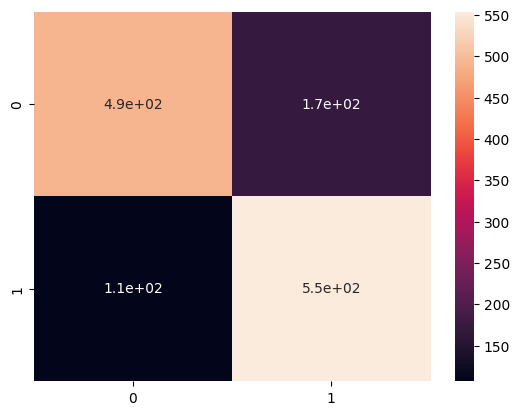

In [68]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, pred), annot = True)